In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [59]:
df = pd.read_csv('Consumo_cerveja.csv')

In [60]:
# df.head()
df.columns = df.columns.str.replace(' ','_')
df.columns = df.columns.str.replace('[()]' ,'')
df.head()

,Data,Temperatura_Media_C,Temperatura_Minima_C,Temperatura_Maxima_C,Precipitacao_mm,Final_de_Semana,Consumo_de_cerveja_litros
0,2015-01-01,"27,3","23,9","32,5",0,0.0,25.461
1,2015-01-02,"27,02","24,5","33,5",0,0.0,28.972
2,2015-01-03,"24,82","22,4","29,9",0,1.0,30.814
3,2015-01-04,"23,98","21,5","28,6","1,2",1.0,29.799
4,2015-01-05,"23,82",21,"28,3",0,0.0,28.900


In [61]:
#Converted to lambda
# def replace_comma_with_dot(s):
#     return float(str(s).replace(",","."))

In [62]:
df['Temperatura_Media_C'] = df['Temperatura_Media_C'].apply(lambda s:float(str(s).replace(",",".")))
df['Temperatura_Minima_C'] = df['Temperatura_Minima_C'].apply(lambda s:float(str(s).replace(",",".")))
df['Temperatura_Maxima_C'] = df['Temperatura_Maxima_C'].apply(lambda s:float(str(s).replace(",",".")))

In [63]:
df.head()
# Final_de_Semana = end of the week

,Data,Temperatura_Media_C,Temperatura_Minima_C,Temperatura_Maxima_C,Precipitacao_mm,Final_de_Semana,Consumo_de_cerveja_litros
0,2015-01-01,27.30,23.9,32.5,0,0.0,25.461
1,2015-01-02,27.02,24.5,33.5,0,0.0,28.972
2,2015-01-03,24.82,22.4,29.9,0,1.0,30.814
3,2015-01-04,23.98,21.5,28.6,"1,2",1.0,29.799
4,2015-01-05,23.82,21.0,28.3,0,0.0,28.900


In [64]:
df.shape

(941, 7)

In [65]:
df.isnull().sum()

Data                         576
Temperatura_Media_C          576
Temperatura_Minima_C         576
Temperatura_Maxima_C         576
Precipitacao_mm              576
Final_de_Semana              576
Consumo_de_cerveja_litros    576
dtype: int64

In [66]:
df.dropna(subset=['Data','Final_de_Semana','Consumo_de_cerveja_litros'],how='all', inplace=True)

In [67]:
df.isnull().sum()

Data                         0
Temperatura_Media_C          0
Temperatura_Minima_C         0
Temperatura_Maxima_C         0
Precipitacao_mm              0
Final_de_Semana              0
Consumo_de_cerveja_litros    0
dtype: int64

In [68]:
df['Data'] = pd.to_datetime(df['Data'])
df['mes'] = pd.to_datetime(df['Data']).dt.month
df['dia_semana'] = pd.to_datetime(df['Data']).dt.dayofweek

In [69]:
df.head()
#dia_semana = dayofweek

,Data,Temperatura_Media_C,Temperatura_Minima_C,Temperatura_Maxima_C,Precipitacao_mm,Final_de_Semana,Consumo_de_cerveja_litros,mes,dia_semana
0,2015-01-01,27.30,23.9,32.5,0,0.0,25.461,1,3
1,2015-01-02,27.02,24.5,33.5,0,0.0,28.972,1,4
2,2015-01-03,24.82,22.4,29.9,0,1.0,30.814,1,5
3,2015-01-04,23.98,21.5,28.6,"1,2",1.0,29.799,1,6
4,2015-01-05,23.82,21.0,28.3,0,0.0,28.900,1,0


In [70]:
df[['Consumo_de_cerveja_litros']].describe()


,Consumo_de_cerveja_litros
count,365.000000
mean,25.401367
std,4.399143
min,14.343000
25%,22.008000
50%,24.867000
75%,28.631000
max,37.937000


In [71]:
df.corr()

,Temperatura_Media_C,Temperatura_Minima_C,Temperatura_Maxima_C,Final_de_Semana,Consumo_de_cerveja_litros,mes,dia_semana
Temperatura_Media_C,1.000000,0.862752,0.922513,-0.050803,0.574615,-0.103169,-0.018669
Temperatura_Minima_C,0.862752,1.000000,0.672929,-0.059534,0.392509,-0.172923,-0.016574
Temperatura_Maxima_C,0.922513,0.672929,1.000000,-0.040258,0.642672,-0.074866,-0.020871
Final_de_Semana,-0.050803,-0.059534,-0.040258,1.000000,0.505981,-0.006526,0.790137
Consumo_de_cerveja_litros,0.574615,0.392509,0.642672,0.505981,1.000000,0.039908,0.413826
mes,-0.103169,-0.172923,-0.074866,-0.006526,0.039908,1.000000,-0.009549
dia_semana,-0.018669,-0.016574,-0.020871,0.790137,0.413826,-0.009549,1.000000


In [72]:
print(df.corr()['Consumo_de_cerveja_litros'].sort_values())


mes                          0.039908
Temperatura_Minima_C         0.392509
dia_semana                   0.413826
Final_de_Semana              0.505981
Temperatura_Media_C          0.574615
Temperatura_Maxima_C         0.642672
Consumo_de_cerveja_litros    1.000000
Name: Consumo_de_cerveja_litros, dtype: float64


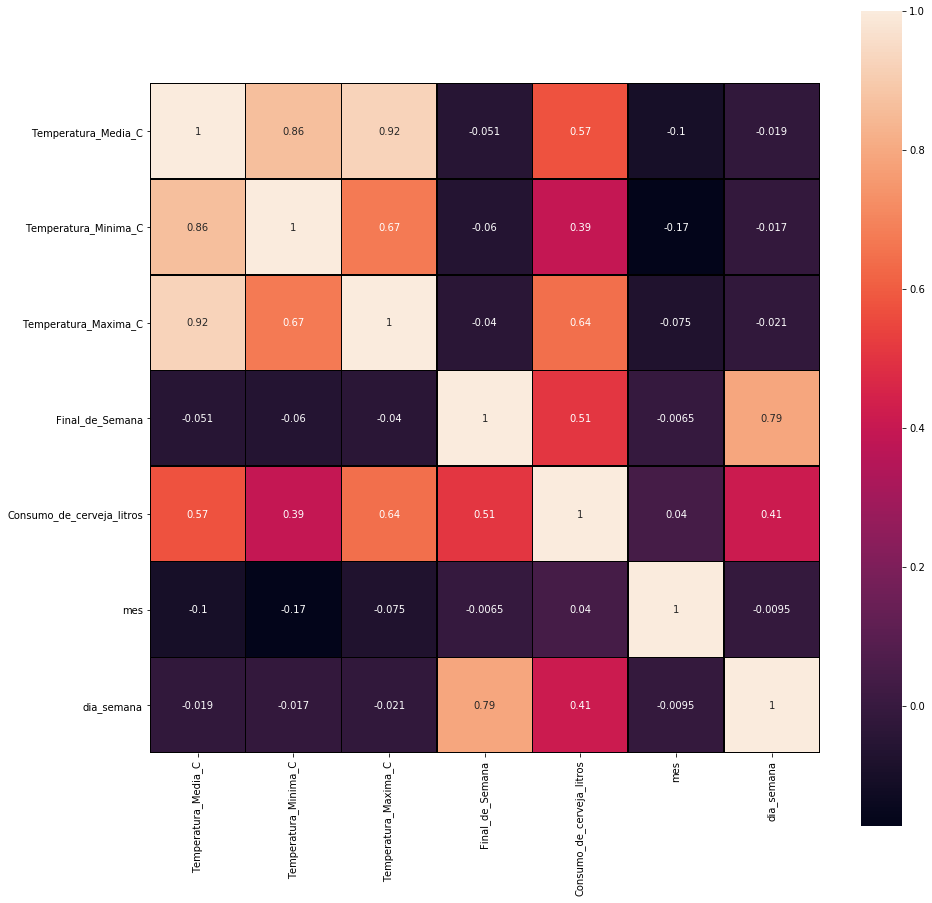

In [84]:
plt.figure(figsize=(15,15));
sns.heatmap(df.corr(), square=True ,annot=True, linewidths=0.5, linecolor='k');


In [89]:
dcc = df.groupby(['Final_de_Semana']).agg({'Consumo_de_cerveja_litros':['count','sum',
                                                                  'mean','std',
                                                                  'median']}).round(3)
dcc

Consumo_de_cerveja_litros                                 
                                    count       sum    mean    std  median
Final_de_Semana                                                           
0.0                                   261  6263.536  23.998  3.788  23.614
1.0                                   104  3007.963  28.923  3.830  29.482

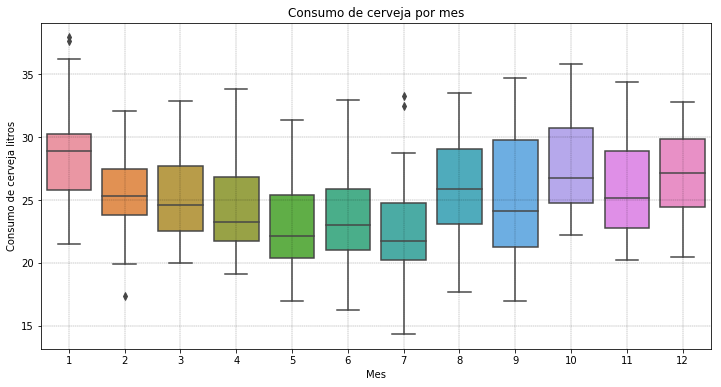

In [99]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='mes', y='Consumo_de_cerveja_litros', data=df)
plt.xlabel('Mes')
plt.ylabel('Consumo de cerveja litros')
plt.title('Consumo de cerveja por mes')
plt.grid(ls='-.', lw=0.2, c='k')

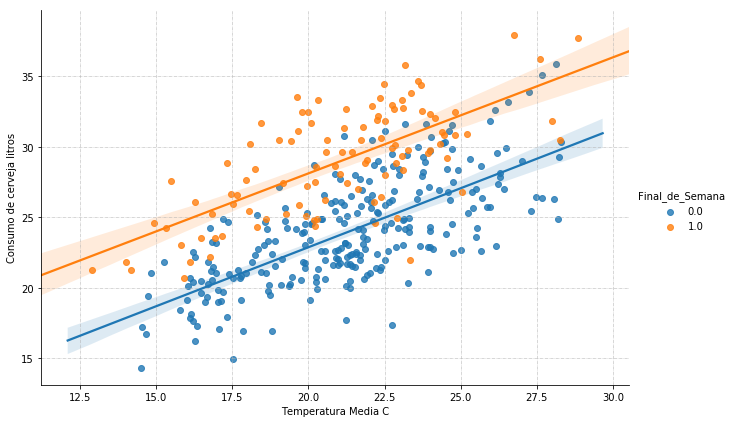

In [101]:
sns.lmplot(x='Temperatura_Media_C', y='Consumo_de_cerveja_litros', hue='Final_de_Semana',
           data=df, aspect=1.5, height=6);

plt.xlabel('Temperatura Media C')
plt.ylabel('Consumo de cerveja litros')
plt.grid(ls='-.', lw=.5)

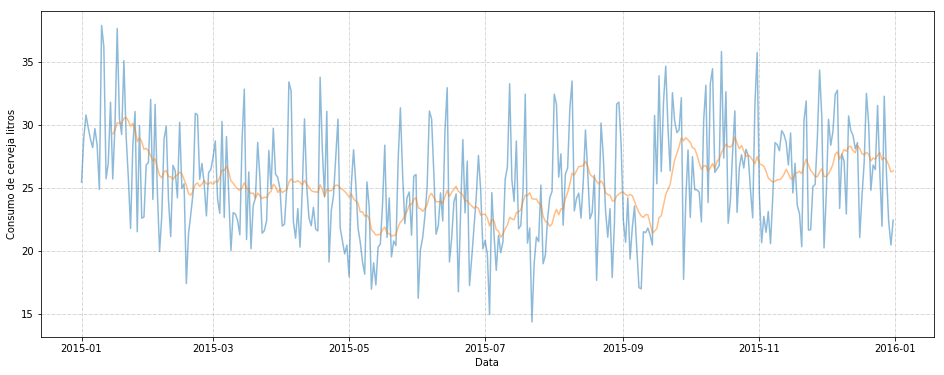

In [102]:
plt.figure(figsize=(16,6))

sns.lineplot(x='Data',y='Consumo_de_cerveja_litros', data=df,alpha=.5);
sns.lineplot(x='Data',y=df['Consumo_de_cerveja_litros'].rolling(15).mean(), data=df,alpha=.5);

plt.ylabel('Consumo de cerveja litros')

plt.grid(ls='-.', lw=.5);